# Análise dos dados do Banco Byte Bank, para a criação de uma aplicação de concessão de crédito.

### Motivação
 
Avaliar se o cliente tem condições de honrar o compromisso financeiro assumido.
### Objetivo
 
Identificar as condições financeiras dos clientes com base nos dados passados por suas informações.
 
### Ganho
 
Evitar inadimplência nas concessões de crédito.




#### Conceitos importantes

**Caso nunca tenha visto**

months On Book (MOB): Número de meses que foram concluídos desde a data de originação do empréstimo.


Análise Vintage: Mede o desempenho em diferentes períodos de tempo após a concessão do empréstimo.

Tabela pivot: É uma tabela estatística que sumariza determinado dado em colunas, quase como um group by.


### Importações

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_clientes_cadastrados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')
df_clientes_cadastrados.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


## Análise dos dados de clientes cadastrados

In [3]:
# Dimensão dos dados
df_clientes_cadastrados.shape

(438557, 18)

In [4]:
# Contando valores de 'ID_Cliente' com a finalidade de ver se tem IDs duplicados
df_clientes_cadastrados['ID_Cliente'].value_counts()

7137299    2
7702238    2
7282535    2
7243768    2
7050948    2
          ..
5690727    1
6621262    1
6621261    1
6621260    1
6842885    1
Name: ID_Cliente, Length: 438510, dtype: int64

In [5]:
# Verificando a existência de algum ciente totalmente duplicado.
df_clientes_cadastrados.duplicated().sum()

0

In [6]:
# Quantidade de IDs duplicados
df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)].shape

(94, 18)

In [7]:
# Atribuindo os IDs duplicados a uma variável auxiliar para posteriormente removê-los.
id_repetidos = df_clientes_cadastrados[df_clientes_cadastrados['ID_Cliente'].duplicated(keep=False)]['ID_Cliente']

# Removendo os IDs duplicados, com o auxílio do variável criada anteriormente.
df_clientes_cadastrados_ID_unicos = df_clientes_cadastrados.drop(id_repetidos.index)
df_clientes_cadastrados_ID_unicos.head()

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [8]:
# Verificando se todos os dados duplicados foram removidos.
df_clientes_cadastrados_ID_unicos['ID_Cliente'].value_counts()

5008804    1
6147691    1
6147689    1
6147688    1
6147685    1
          ..
6093492    1
5690720    1
6538938    1
6538937    1
6842885    1
Name: ID_Cliente, Length: 438463, dtype: int64

In [9]:
# Verificando se existe algum valor faltante nos dados.
df_clientes_cadastrados_ID_unicos.isnull().sum()

ID_Cliente               0
Genero                   0
Tem_Carro                0
Tem_Casa_Propria         0
Qtd_Filhos               0
Rendimento_Anual         0
Categoria_de_renda       0
Grau_Escolaridade        0
Estado_Civil             0
Moradia                  0
Idade                    0
Tem_Celular              0
Tem_telefone_trabalho    0
Tem_telefone_fixo        0
Tem_email                0
Ocupacao                 0
Tamanho_Familia          0
Anos_empregado           0
dtype: int64

In [10]:
# Abstraindo informações dos tipos de dados de cada coluna.
df_clientes_cadastrados_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Genero                 438463 non-null  object 
 2   Tem_Carro              438463 non-null  int64  
 3   Tem_Casa_Propria       438463 non-null  int64  
 4   Qtd_Filhos             438463 non-null  int64  
 5   Rendimento_Anual       438463 non-null  float64
 6   Categoria_de_renda     438463 non-null  object 
 7   Grau_Escolaridade      438463 non-null  object 
 8   Estado_Civil           438463 non-null  object 
 9   Moradia                438463 non-null  object 
 10  Idade                  438463 non-null  float64
 11  Tem_Celular            438463 non-null  int64  
 12  Tem_telefone_trabalho  438463 non-null  int64  
 13  Tem_telefone_fixo      438463 non-null  int64  
 14  Tem_email              438463 non-nu

In [11]:
# Separando as culunas Quantitativas
colunas_quantitativas = ['Idade','Qtd_Filhos','Rendimento_Anual','Anos_empregado','Tamanho_Familia']
# Gerando estatísticas básicas
df_clientes_cadastrados_ID_unicos[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,438463.000000,438463.000000,4.384630e+05,438463.000000,438463.000000
mean,43.834032,0.427384,1.875220e+05,-165.936036,2.194461
std,11.472815,0.724879,1.100832e+05,380.201131,0.897194
min,21.000000,0.000000,2.610000e+04,-1000.700000,1.000000
25%,34.000000,0.000000,1.215000e+05,1.000000,2.000000
50%,43.000000,0.000000,1.611000e+05,4.000000,2.000000
75%,53.000000,1.000000,2.250000e+05,8.500000,3.000000
max,69.000000,19.000000,6.750000e+06,48.000000,20.000000


In [12]:
# Pesquisando nos dados pessoas com 0 ou menos anos de trabalho, e somando a quantidade por categoria. 
# Obviamente uma pessoa não pode ter um tempo negativo de trabalho, 
# ou seja isso deve ter sido a maneira de contar quantos anos a pessoa está desempregada. 
# E além do mais para pensionistas está dando como -1000.7 anos o que tas foi uma forma de notação, a qual será usada a seguir.
df_clientes_cadastrados_ID_unicos.query("Anos_empregado <= 0")[['Anos_empregado', 'Categoria_de_renda']].value_counts()

Anos_empregado  Categoria_de_renda 
-1000.7         Pensionista            75314
 0.0            Empregado                 26
                Servidor publico          11
                Associado comercial        7
dtype: int64

In [13]:
# Trocando o -1000.7 por menos -1 para a identificação de pensionistas.
df_clientes_cadastrados_ID_unicos['Anos_empregado'] = df_clientes_cadastrados_ID_unicos['Anos_empregado'].replace(-1000.7, -1)
df_clientes_cadastrados_ID_unicos[['Categoria_de_renda','Anos_empregado']].head(5)

,Categoria_de_renda,Anos_empregado
0,Empregado,12.4
1,Empregado,12.4
2,Empregado,3.1
3,Associado comercial,8.4
4,Associado comercial,8.4


## Análise grafica

In [14]:
#Aqui uma função para fazer os graficos de maneira padronizanao, e não ficar fazendo toda hora o meso trabalho.
# É só passar o tipo de grafico, os dados, a coluna, e a legenda para esta coluna.
def monta_grafico(tipo:int, dataframe, coluna, legenda):
    if tipo == 1: 
        sns.countplot(data=dataframe, x=coluna, order = coluna.value_counts().index)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(legenda)
        plt.ylabel('Contagem')
        plt.show()
    if tipo == 2: 
        sns.histplot(data=dataframe, x=coluna, bins=10)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(legenda)
        plt.ylabel('Contagem')
        plt.show()
    if tipo == 3: 
        sns.boxplot(data=dataframe, y=coluna)
        # plt.xticks(rotation=45, ha='right')
        plt.xlabel('Distribuição')
        plt.ylabel(legenda)

        plt.show()

In [15]:
#Aqui uma função para fazer os graficos de maneira padronizanao, e não ficar fazendo toda hora o meso trabalho.
# É só passar o tipo de grafico, os dados, a coluna, e a legenda para esta coluna.
def monta_graficos(tipo:str, dataframe, coluna, legenda):
    if tipo == 'count': 
        sns.countplot(data=dataframe, x=coluna)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(legenda)
        plt.ylabel('Contagem')
        plt.show()
    if tipo == 'hist': 
        sns.histplot(data=dataframe, x=coluna, bins=10)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(legenda)
        plt.ylabel('Contagem')
        plt.show()
    if tipo == 'box': 
        sns.boxplot(data=dataframe, y=coluna)
        # plt.xticks(rotation=45, ha='right')
        plt.xlabel('Distribuição')
        plt.ylabel(legenda)
        plt.show()
    if tipo == 'count_ordenado': 
        sns.countplot(data=dataframe, x=coluna, order = dataframe[coluna].value_counts().index)
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(legenda)
        plt.ylabel('Contagem')
        plt.show()    

Alguns gráficos boxplot e histplot, para a verificação da distribuição dos dados, a verificação de outliers e um maior entendimento dos dados.

##### Anos Empregado

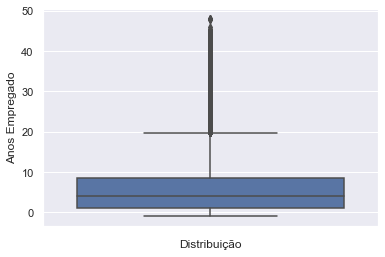

In [16]:
# Usando a função de montar grafico, um grafico para ver como esta a distriuição de renda dos nossos clientes
monta_graficos('box', df_clientes_cadastrados_ID_unicos, 'Anos_empregado', 'Anos Empregado')

A distribuição mostra claramente um número de empregados entre 0 a 10 de trabalho muito aior que o resto, o que seria o mais condizente com a realidade. E ainda alguns dados de 20 a 50.

In [17]:
# Apenas para confirmar nutriente o que nosso gráfico mostrou, a grande concentração de clientes entre 0 a 10.
df_clientes_cadastrados_ID_unicos.query("0 < Anos_empregado <= 10")[['Anos_empregado']].value_counts().sum()


278778

In [18]:
# Apenas para confirmar nutriente o que nosso gráfico mostrou, os nossos outiers de clientes entre 20 a 50.
df_clientes_cadastrados_ID_unicos.query("20 < Anos_empregado <= 50")[['Anos_empregado']].value_counts().sum()


20849

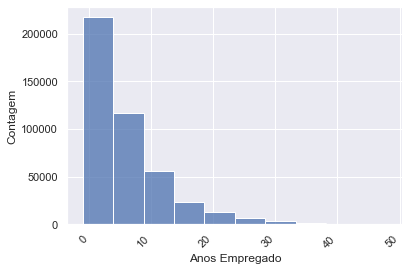

In [19]:
# Outra maneira de ver o declínio, quando se trata de uma maior quantidade de anos empregado.
monta_graficos('hist', df_clientes_cadastrados_ID_unicos, 'Anos_empregado', 'Anos Empregado')

##### Rendimento Anual

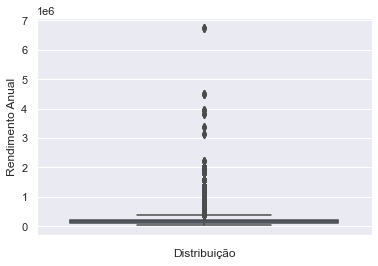

In [21]:
monta_graficos('box', df_clientes_cadastrados_ID_unicos, 'Rendimento_Anual', 'Rendimento Anual')

O gráfico ficou praticamente ilegível, vou diminuir o limite de Y, para ter uma melhor visualização. Mesmo sabendo que não é uma boa prática, porém no atual momento o que mais importa é o miolo do gráfico.

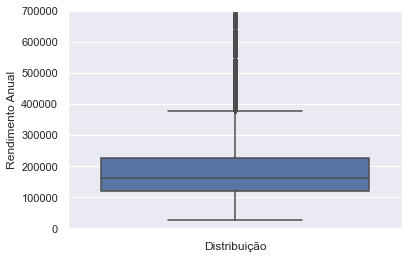

In [22]:
# O limite foi diminuído, para poder deixar visível a parte que mais importa no gráfico no momento.
# Sabendo que foi perdido dados de outliers.
plt.ylim(0, 700000)
monta_graficos('box', df_clientes_cadastrados_ID_unicos, 'Rendimento_Anual', 'Rendimento Anual')

 
Como os outliers estão atrapalhando serão removidos e logo após irei plotar o gráfico novamente.


In [24]:
# Uma função para remover outliers de determinada coluna
# Só passar a coluna a ser alterada.
def remove_out(coluna:str):
    coluna = df_clientes_cadastrados_ID_unicos[coluna]

    coluna_med = coluna.mean()
    coluna_std = coluna.std()

    limite_sup = coluna_med + (2 * coluna_std)
    limite_inf = coluna_med - (2 * coluna_std)

    index_outliers_y = []

    for index, valor in  coluna.items():
        if valor > limite_sup or valor < limite_inf:
            index_outliers_y.append(index)
            
    return index_outliers_y



In [27]:
# Usando a função de remoção de outliers, para removê-los da coluna Rendimento anual.
list_remov = remove_out('Rendimento_Anual')

remover_outliers_df_clientes_cadastrados = df_clientes_cadastrados_ID_unicos
df_clientes_cadastrados_sem_outlier = remover_outliers_df_clientes_cadastrados.drop(list_remov)

# Estatisticas basicas das colunas Quantitativas. Agora sem os outliers de rendimento. 
df_clientes_cadastrados_sem_outlier[colunas_quantitativas].describe()

,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia
count,425822.000000,425822.000000,425822.000000,425822.000000,425822.000000
mean,43.838707,0.425314,176384.728083,5.744956,2.191683
std,11.525400,0.723577,75033.530551,6.736649,0.896300
min,21.000000,0.000000,26100.000000,-1.000000,1.000000
25%,34.000000,0.000000,117000.000000,1.000000,2.000000
50%,43.000000,0.000000,157500.000000,4.000000,2.000000
75%,53.000000,1.000000,225000.000000,8.500000,3.000000
max,69.000000,19.000000,405000.000000,48.000000,20.000000


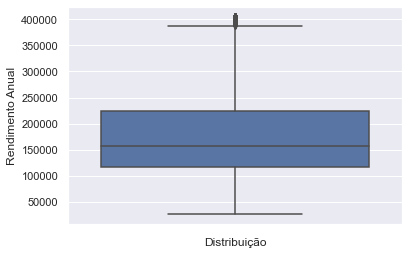

In [30]:
monta_graficos('box', df_clientes_cadastrados_sem_outlier, 'Rendimento_Anual', 'Rendimento Anual')

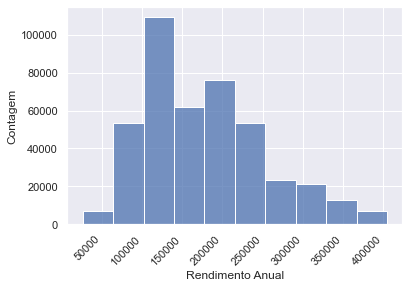

In [31]:
monta_graficos('hist', df_clientes_cadastrados_sem_outlier,'Rendimento_Anual', 'Rendimento Anual')

Se nota uma grande concentração de 10000 a 250000 de rendimento anual.

##### Idade

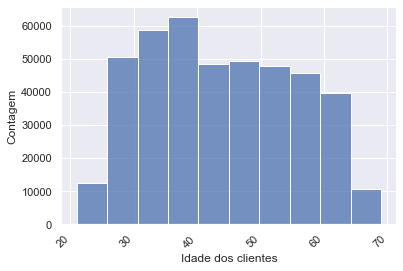

In [32]:
monta_graficos('hist', df_clientes_cadastrados_sem_outlier, 'Idade', 'Idade dos clientes')

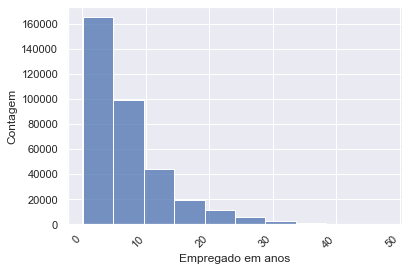

In [34]:
monta_graficos('hist', df_clientes_cadastrados_sem_outlier.query("Anos_empregado > 0"), 'Anos_empregado', 'Empregado em anos')

##### Estado Civil

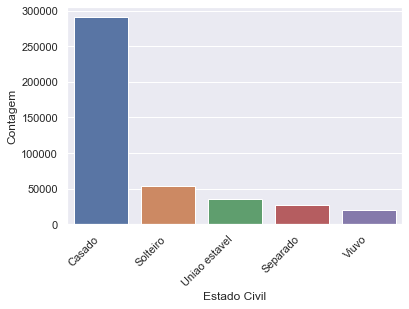

In [35]:
monta_graficos('count_ordenado', df_clientes_cadastrados_sem_outlier, 'Estado_Civil', 'Estado Civil')

##### Tem Celular

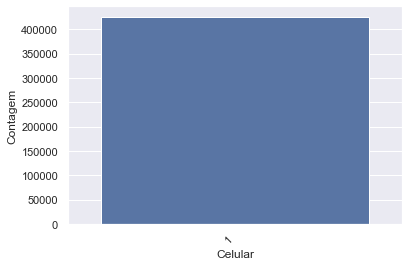

In [36]:
monta_graficos('count', df_clientes_cadastrados_sem_outlier, 'Tem_Celular', 'Celular')

Todos têm celular. Essa coluna deverá ser excluída, ela será após o fim da análise, a fim de que se houver mais alguma que deva ser excluída elas estarão juntas.


##### Telefone Fixo

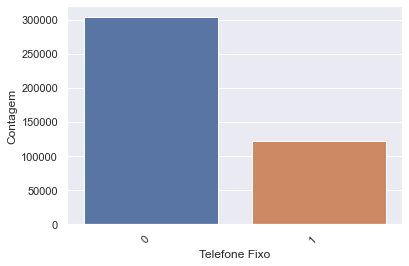

In [37]:
monta_graficos('count', df_clientes_cadastrados_sem_outlier, 'Tem_telefone_fixo', 'Telefone Fixo')

##### Ocupação

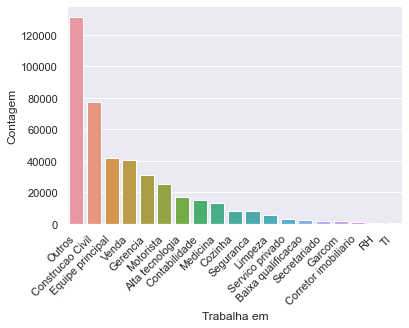

In [38]:
monta_graficos('count_ordenado',df_clientes_cadastrados_sem_outlier, 'Ocupacao', 'Trabalha em')

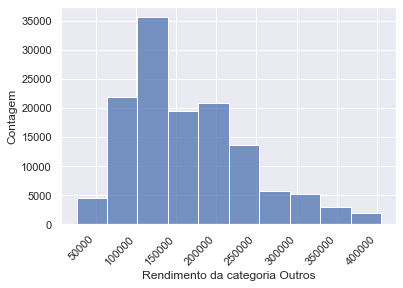

In [39]:
monta_graficos('hist', df_clientes_cadastrados_sem_outlier.query("Ocupacao == 'Outros'"), 'Rendimento_Anual', 'Rendimento da categoria Outros')

A maior parte dos clientes, da categoria Outro, encontra-se entre 100000 a 250000. Sendo desta parte a maior fica por perto dos 150000 de rendimento anual.

##### Exclusão de colunas desnecessarias

A coluna, Tem_telefone, será excluída pois apresenta o mesmo valor para todos os colunas.
<br> A coluna, Gênero, será excluída por ser contra a lei usar genero para análise de crédito.


In [40]:
df_clientes_cadastrados_tratamento1= df_clientes_cadastrados_sem_outlier.drop(['Genero', 'Tem_Celular'], axis=1)
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [41]:
# Para deixar separado os tipos de colunas que tenho nos dados
colunas_quantitativas = ['Idade', 'Qtd_Filhos', 'Rendimento_Anual', 'Anos_empregado', 'Tamanho_Familia']

colunas_categoricas = ['Genero', 'Tem_Carro', 'Tem_Casa_Propria', 
                        'Categoria_de_renda', 'Grau_Escolaridade', 
                        'Estado_Civil', 'Moradia', 'Tem_Celular',
                        'Tem_telefone_trabalho', 'Tem_telefone_fixo', 'Tem_email',
                        'Ocupacao']

In [42]:
# Removendo as duas colunas da lista de categorias também.
colunas_categoricas.remove('Genero')
colunas_categoricas.remove('Tem_Celular')
colunas_categoricas

['Tem_Carro',
 'Tem_Casa_Propria',
 'Categoria_de_renda',
 'Grau_Escolaridade',
 'Estado_Civil',
 'Moradia',
 'Tem_telefone_trabalho',
 'Tem_telefone_fixo',
 'Tem_email',
 'Ocupacao']

## Análise dos clientes aprovados

In [43]:
# Importação do segundo dataset.
df_clientes_aprovados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_aprovados.csv')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [44]:
# Abstraindo informações dos tipos de dados de cada coluna.
df_clientes_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [45]:
# De um total de 425822 clientes cadastrados, temos quantos aceitos?
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

In [46]:
#  Buscando pela quantidade de IDs clientes aceitos
df_clientes_aprovados.ID_Cliente.value_counts().shape

(45985,)

Tem se um pouco mais de 10% de aprovações. 

A fim de estudar a estrutura em que os dados estão, vou listar o primeiro ID

In [47]:
#Busca pelo ID 5001711
df_clientes_aprovados.query("ID_Cliente == 5001711")

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


Vou para o segundo ID ver se esse possui mais linhas e com isso mais informações.

In [48]:
df_clientes_aprovados.query("ID_Cliente == 5001712")

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


Aqui foi possivel ver que a faixa de atraso consiste em no minimo: nenhum empréstimo, pagamento realizado, 1-29 dias.
<br> Já do mes referencia ainda não é possivel tirar conclusões.

##### Faixa de Atraso

In [49]:
# Para descobrir quais são todas as faixa_atraso
df_clientes_aprovados.Faixa_atraso.value_counts().index.to_list()


['pagamento realizado',
 '1-29 dias',
 'nenhum empréstimo',
 '30-59 dias',
 '>150 dias',
 '60-89 dias',
 '90-119 dias',
 '120-149 dias']

Existem 8 faixas, desde nenhum empréstimo, pagamento realizado até 120-149 dias.


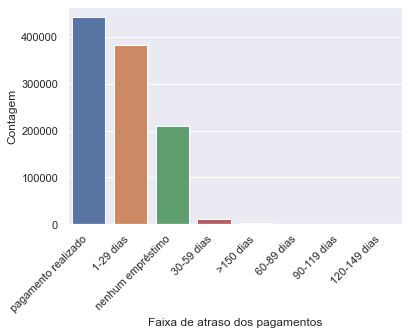

In [50]:
# Como está a distribuição gráfica das Faixa de Atraso
monta_graficos('count_ordenado', df_clientes_aprovados, 'Faixa_atraso', 'Faixa de atraso dos pagamentos')

Tem pagamento realizado e 1-29 dias como a grande maioria, seguida de nenhum empréstimo, ainda no gráfico é possível ver a faixa 30-59 dias e o restante não se tem visualização.

In [ ]:
df_atraso = df_clientes_aprovados.groupby('Faixa_atraso').count()['ID_Cliente'].reset_index()
df_atraso['Qtd_clientes'] = df_atraso['ID_Cliente']
df_atraso = df_atraso.drop(['ID_Cliente'], axis=1)
df_atraso

,Faixa_atraso,Qtd_clientes
0,1-29 dias,383120
1,120-149 dias,223
2,30-59 dias,11090
3,60-89 dias,868
4,90-119 dias,320
5,>150 dias,1693
6,nenhum empréstimo,209230
7,pagamento realizado,442031


Agora é possivel ter uma melhor noção dos dados que não ficaram claros no grafico.

##### Mês Referência

In [51]:
df_registros_creditos_agrupados_ID = df_clientes_aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_creditos_agrupados_ID.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

ID_Cliente
5001711    -3
5001712   -18
5001713   -21
5001714   -14
5001715   -59
           ..
5150482   -28
5150483   -17
5150484   -12
5150485    -1
5150487   -29
Name: Abertura, Length: 45985, dtype: int64

Agora é possível concluir que do mês referência, o menor valor seria a quanto tempo a conta foi cadastrada.

In [52]:
# Para deixar a abertura de conta de uma maneira mais visual e fácil.
df_clientes_aprovados = df_clientes_aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [53]:
# Para adicionar o último pagamento.
ser_final = df_registros_creditos_agrupados_ID.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

ID_Cliente
5001711     0
5001712     0
5001713     0
5001714     0
5001715     0
           ..
5150482   -11
5150483     0
5150484     0
5150485     0
5150487     0
Name: Final, Length: 45985, dtype: int64

In [54]:
#Fazendo o merge com o último pagamento.
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [110]:
# A Janela de todo o Pagamento, sendo o mês de Pagamento final menos o mês de Abertura.
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
93598,5008844,-11,pagamento realizado,-43,-11,32,32,1,0,0,0,0,0,0
93599,5008844,-12,pagamento realizado,-43,-11,32,31,1,0,0,0,0,0,0
93600,5008844,-13,pagamento realizado,-43,-11,32,30,1,0,0,0,0,0,0
93601,5008844,-14,pagamento realizado,-43,-11,32,29,1,0,0,0,0,0,0
93602,5008844,-15,pagamento realizado,-43,-11,32,28,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048507,5150482,-24,1-29 dias,-28,-11,17,4,2,0,0,0,0,0,0
1048508,5150482,-25,1-29 dias,-28,-11,17,3,2,0,0,0,0,0,0
1048509,5150482,-26,1-29 dias,-28,-11,17,2,2,0,0,0,0,0,0
1048510,5150482,-27,1-29 dias,-28,-11,17,1,2,0,0,0,0,0,0


In [56]:
# A adição do MOB
df_clientes_aprovados['MOB'] = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [57]:
# A criação de um dicionário para setar valor as Faixas de Atraso
dict_faixa_atraso_ind = {'nenhum empréstimo': 0, 'pagamento realizado': 1, '1-29 dias': 2,
                        '30-59 dias': 3,  '60-89 dias': 4, '90-119 dias': 5, '120-149 dias': 6, '>150 dias':7}

In [58]:
# Usando a função Map para percorrer os dados e setar o número a faixa correspondente.
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1
...,...,...,...,...,...,...,...,...
1048570,5150487,-25,pagamento realizado,-29,0,29,4,1
1048571,5150487,-26,pagamento realizado,-29,0,29,3,1
1048572,5150487,-27,pagamento realizado,-29,0,29,2,1
1048573,5150487,-28,pagamento realizado,-29,0,29,1,1


In [59]:
# Criando uma coluna Mau, para representar quando um cliente é considerado um Mau pagador, por conta do seu atraso com os pagamentos.
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis= 1) 
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


Foi considerado 3(Três) mês de atraso para o cliente se tornar um mau pagador.

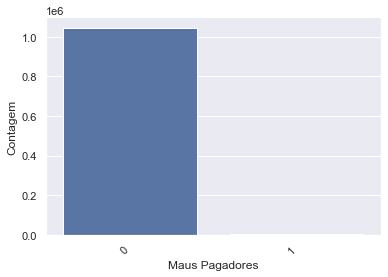

In [60]:
#Para ilustrar os bons pagadores e os maus.
monta_graficos('count', df_clientes_aprovados, 'Mau', 'Maus Pagadores')

Notasse uma enorme diferença entre os bons(muito) para os Maus(não é possível visualizar no gráfico). O'Que é bom pois o banco não pode aceitar muito clientes com esse perfil, pois caso aceito corre grande risco de falência.


In [111]:
df_clientes_aprovados.query("Mau == 1").shape

(3104, 14)

In [112]:
df_clientes_aprovados.query("Mau == 0").shape

(1045471, 14)

Menos de 3% dos clientes são considerados 'Mau', sendo Maus Pagadores.

In [62]:
# Para visualizar apenas o Cliente, sua abertura, seu último pagamento e a janela. 
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente', 'Abertura', 'Final', 'Janela']].groupby('ID_Cliente').apply(lambda x: x.iloc[0]).reset_index(drop=True)
df_registros_creditos_ID

,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59
...,...,...,...,...
45980,5150482,-28,-11,17
45981,5150483,-17,0,17
45982,5150484,-12,0,12
45983,5150485,-1,0,1


In [114]:
# Para agrupar os clientes pelas aberturas.
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador.sort_values(by=['Qtd_Clientes'], ascending=False)

,Abertura,Qtd_Clientes
53,-7,1121
49,-11,1038
52,-8,1028
50,-10,1027
54,-6,1025
...,...,...
2,-58,440
0,-60,415
1,-59,406
3,-57,400


Os dias mais recentes têm uma maior quantidade de abertura de clientes, o que pode ser explicado com o crescimento do banco, sendo assim ele comporta mais risco de crédito.

## Análise Vintage

In [64]:
# Para ter uma ideia da quantidade de cliente com cada qual tempo de Abertura e também divido pelo MOB
df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura','MOB', 'Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [65]:
#Substituindo a quantidade de cliente em cada MOB pelo balanço final de clientes em cada abertura.
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on=['Abertura'], how='left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686



Por janela, qual a taxa de clintes considerados 'Mau's ? E quantos são?

In [67]:
# Criando uma coluna 'Qtd_Mau' para armazenar a quantida de clientes considerados 'Mau'
# Armazenado em uma lista cada vez que um cliente entra nos requisitos, e depois contando a uantidade por Abertura. 
df_vintage['Qtd_Mau'] = np.nan
for j in range (-60,1):
    ls = []
    for i in range (0, 61):
        due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
        ls.extend(due)
        df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))
# Criando a Taxa de clientes 'Mau' com uma simples operação de dividr a quantidade de 'Mau' pelo total de clientes.
df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage


,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


Para cada cliente foi gerado uma taxa de quanto mau pagador ele é.

In [116]:
#Criação de um data frame pivot
df_vintage_pivot = df_vintage.pivot(index= 'Abertura',
                            columns= 'MOB',
                            values = 'Taxa_de_Mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
# Para descobrir a tendência dos dados utilizando o dataframe pivot.
lst = [i for i in range(0,61)]
df_vintage_pivot[lst].T.iloc[:,:10].plot(legend = True, grid = True, title = '% acumulado de maus clientes (Atraso > que 60 dias)')

plt.xlabel('MOB')
plt.ylabel('% acumulado de "Mau"s')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

NameError: name 'df_vintage_pivot' is not defined

 
Quanto maior crescer o MOB, mais se encontra 'Mau's pagadores.


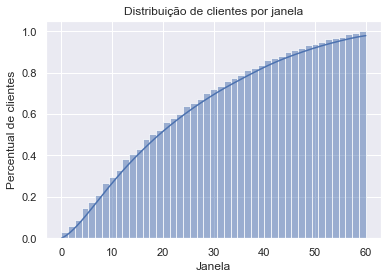

In [70]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('Percentual de clientes')
plt.show()

O gráfico apresenta uma tendência de subida, a qual é esperada, com o passar das janelas

In [71]:
# Cirnação de um dicionario para dar valor a os atrasos.
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4, 'maior_90_dias': 5,
                        'maior_120_dias': 6, 'maior_150_dias': 7}

Será utilizado para transformar cada intervalo de atraso em uma coluna.

In [122]:
# Criando uma coluna com para cada intervalo de atraso
# Setando um até o maior maior_x_dias de cada cliente.
for chave, valor in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{chave}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= valor else 0, axis=1) # mais de 60
df_clientes_aprovados.head()

In [73]:
# Criando Taxa de 'Mau' para cada um dos maior_x_dias
# Quase da mesma forma que quando foi criado a Taxa_de_Mau
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


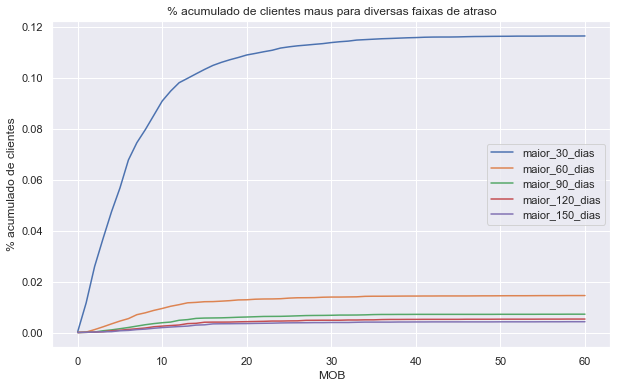

In [74]:
# Para ver gráficamente como cada Taxa_X_dia se comporta.
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes "Mau"s para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Como esperado, a maior_30_dias é a maior de todas, a fim todas as outras taxas tem q passar por ela, já que está feito de maneira acumulativa. Quanto maior os dias, menos tem gente consequentemente menos 'Mau' pagadores tem-se.

In [75]:
# contando os clientes com mais de 12meses (um ano).
len(df_clientes_aprovados.query('Janela >= 12').groupby('ID_Cliente').count().index)

30918

In [128]:
len(df_clientes_aprovados.groupby('ID_Cliente').count().index)
# Haverá um perda de 1/3 de clientes, porém como os mesmos tem pouco tempo de conta, não se perderá muits dados.

45985

In [76]:
# Apenas os clinetes com mais de 12meses (um ano) serão usados
df_clientes_aprovados_tratamento1 = df_clientes_aprovados.query('Janela >= 12').copy()
df_clientes_aprovados_tratamento1.shape

(943061, 14)

In [129]:
# Para comparar com os dados de df_clientes_aprovados_tratamento1, para ter certeza de que nçao foi perdida muita coisa.
df_clientes_aprovados.shape


(1048575, 14)

In [77]:
# Definiindo como 'Mau' os clientes, por ID, que tenham mais de 60 dias de atraso.
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status or '90-119 dias' in lista_status or '120-149 dias' in lista_status or '>150 dias' in lista_status:
    return 1
  else:
    return 0
  
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento1.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


 
Essa classificação é necessária para a criação de um alvo, para poder usar os dados em classificação rotulado, ou supervisionada.
Que é o que estamos buscando com a análise de crédito. Saber se é possível aceitar o cliente ou não, com os dados passado por ele, depende de como ele será classificado.


In [78]:
# Apenas para saber a dimensão que o df_registros_creditos_id ficou no fim.
df_registros_creditos_id.shape

(30918, 2)

In [79]:
# Apenas para saber a dimensão que o df_clientes_cadastrados_tratamento1 ficou no fim.
df_clientes_cadastrados_tratamento1.shape

(425822, 16)

## Preparação dos dados para Clientes Alvos

In [80]:
# Juntando tudo, o data frame que contém todas as informações de cada cliente com o seu veredito final, se é 'Mau' ou não.
# Assim criando no target(Alvo)
df_registro_clientes_targets = df_clientes_cadastrados_tratamento1.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado,Mau
0,5008806,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,0,0,0,Seguranca,2.0,3.1,0
1,5008810,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
2,5008811,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,0,1,1,Venda,1.0,8.4,0
3,5008812,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0
4,5008813,0,1,0,283500.0,Pensionista,Ensino superior,Separado,Casa propria,62.0,0,0,0,Outros,1.0,-1.0,0


In [81]:
# Para saber a porcentagem de cada caso, Mau ou 'bom' pagador
df_registro_clientes_targets['Mau'].value_counts(normalize=True)*100
# Talvez na modelagem seja necessário o uso de técnicas de balanceamento, senão um simples modelo Dummy chutando o mais frequente teria quase 98% de acerto.
# E muito provavelmente isso se tornaria um prejuízo, afinal como todo novo cliente seria tido como 'bom', não seria possível medir nada.


0    97.726673
1     2.273327
Name: Mau, dtype: float64

É possível notar uma esmagadora maioria como 'bom' pagador, o que é ótimo.
Afinal de 'Mau's pagadores um banco não sobrevive.



In [82]:
#Separando da lista de colunas categóricas, as que são binárias das que não são, com a finalidade de deixar os dados finais mais organizados.
colunas_categoricas_binarias = ['Tem_Carro','Tem_Casa_Propria','Tem_telefone_trabalho','Tem_telefone_fixo','Tem_email']

colunas_categoricas_nao_binarias = ['Categoria_de_renda','Grau_Escolaridade','Estado_Civil','Moradia','Ocupacao']


In [130]:
# Juntando tudo de maneira organizada, assim serão utilizados nos modelos e predições. O que estará em outro notebook.
df_registro_clientes_targets = df_registro_clientes_targets[['ID_Cliente'] + colunas_quantitativas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]
df_registro_clientes_targets.head()

,ID_Cliente,Idade,Qtd_Filhos,Rendimento_Anual,Anos_empregado,Tamanho_Familia,Tem_Carro,Tem_Casa_Propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Ocupacao,Mau
0,5008806,59.0,0,112500.0,3.1,2.0,1,1,0,0,0,Empregado,Ensino medio,Casado,Casa propria,Seguranca,0
1,5008810,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
2,5008811,52.0,0,270000.0,8.4,1.0,0,1,0,1,1,Associado comercial,Ensino medio,Solteiro,Casa propria,Venda,0
3,5008812,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
4,5008813,62.0,0,283500.0,-1.0,1.0,0,1,0,0,0,Pensionista,Ensino superior,Separado,Casa propria,Outros,0
